<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import requests
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping







The first dataset I'm loading now is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. This dataset has 21 feature variables

In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

#Store the dataset into a pandas DataFrame
df = pd.read_csv(url)

#Shuffle the rows of the dataset
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
#print the head of the dataset
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [ ]:
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Here I'm using the one-hot encoding to transform the target label into an array suitable for neural network, as there are three classes for my Y.
y_encoded = pd.get_dummies(df['Diabetes_012'])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(y_test.shape)
model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(y_train.shape[1], activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()



(50736, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1408      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5763 (22.51 KB)
Trainable params: 5763 (22.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model1.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3928 - accuracy: 0.8510 - val_loss: 0.3934 - val_accuracy: 0.8508
Epoch 2/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3919 - accuracy: 0.8509 - val_loss: 0.3939 - val_accuracy: 0.8501
Epoch 3/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3914 - accuracy: 0.8514 - val_loss: 0.3931 - val_accuracy: 0.8498


1586/1586 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8456
Test Accuracy: 84.56%
1586/1586 [==============================] - 2s 1ms/step


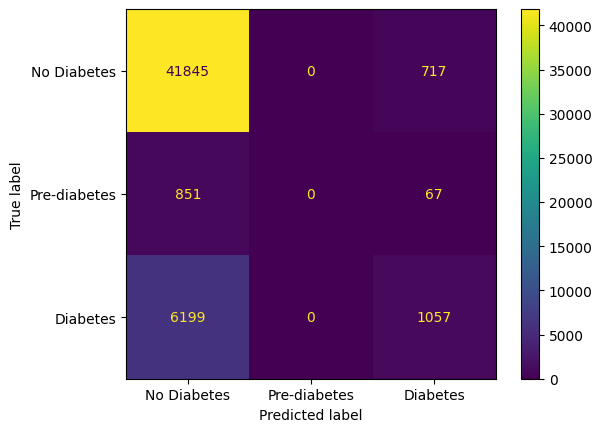

In [ ]:
#history = model1.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Generate predictions
y_pred = model1.predict(X_test)

# Convert predictions to label
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test.to_numpy(), axis=1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_label, y_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
disp.plot()
plt.show()

This model can't evaluate the pre-diabetes at all. This might be due to class imbalance. In fact the class of prediabetes and diabetes constitute a vast minority of the dataset compared to the non diabetes case. What I will do is to use other 2 datasets to see if there is any improvement.

*   First I will use the second dataset that has class 1 and 2 of the target label, from the previous dataset, merged, so that prediabetes and diabetes fall under one single category. 0 is now for no diabetes, and 1 is for prediabetes or diabetes. It has the same number of surveys: 253,680 to the CDC's BRFSS2015.
*   
After I'll use the third dataset which has an equal number of split of diabetes and non diabetes cases. So, some rows of data have been deletes to achieve a 50/50 split leaving a total data of 70692 rows.


Let's proceed with the first approach now uploading the second dataset.


In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes2.csv"

#Store the dataset into a pandas DataFrame
df2 = pd.read_csv(url)

print(df2['Diabetes_binary'].unique())
df2.head()


[0. 1.]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)
# Scale the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(202944, 21)
(202944,)
(50736, 21)
(50736,)


In [ ]:
# Build the model
model2 = Sequential()
model2.add(Dense(128, input_shape=(X_train2.shape[1],), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               2816      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
train2 = model2.fit(X_train2, y_train2, epochs=2, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/2
5074/5074 [==============================] - 15s 3ms/step - loss: 0.3188 - accuracy: 0.8642 - val_loss: 0.3167 - val_accuracy: 0.8662
Epoch 2/2
1586/1586 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.8675
Test Accuracy: 86.75%


1586/1586 [==============================] - 2s 1ms/step


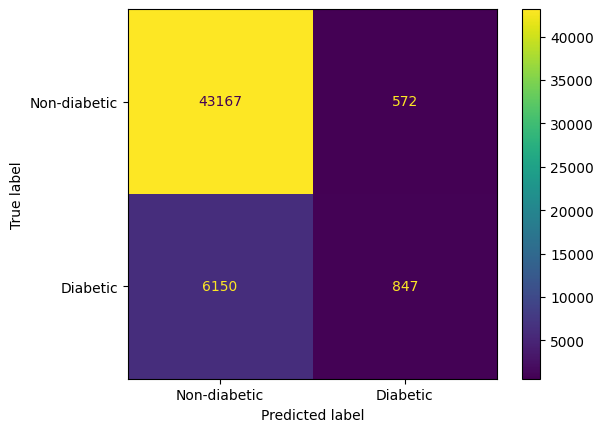

In [ ]:
# Make predictions on the test set
y_pred2 = model2.predict(X_test2)
y_pred2 = np.round(y_pred2).astype(int)  # Converting probabilities to binary class labels

# Generating the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

The accuracy is a bit higher than the previous one. However it is crucial to predic the diabetes case with hiher accuracy than the non diabetes one.
Let's now proceed evaluating the model with the last dataset with an equal 50/50 split of 0 and 1 cases.




In [ ]:
url = "https://sykathowlader.github.io/visualization_data/diabetes50_50.csv"

#Store the dataset into a pandas DataFrame
df3 = pd.read_csv(url)
df3.head()
#Split X and y
y3 = df3['Diabetes_binary']
X3 = df3.drop('Diabetes_binary', axis=1)
# Scale the features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)
# Build the model
model3 = Sequential()
model3.add(Dense(128, input_shape=(X_train3.shape[1],), activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 128)               2816      
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dense_111 (Dense)           (None, 32)                2080      
                                                                 
 dense_112 (Dense)           (None, 1)                 33        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
train3 = model3.fit(X_train3, y_train3, epochs=100, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model3.evaluate(X_test3, y_test3)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
1414/1414 [==============================] - 4s 2ms/step - loss: 0.5142 - accuracy: 0.7463 - val_loss: 0.5030 - val_accuracy: 0.7505
Epoch 2/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.7545 - val_loss: 0.5073 - val_accuracy: 0.7490
Epoch 3/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.7552 - val_loss: 0.5054 - val_accuracy: 0.7472
Epoch 4/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4985 - accuracy: 0.7565 - val_loss: 0.5063 - val_accuracy: 0.7512
Epoch 5/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4971 - accuracy: 0.7578 - val_loss: 0.5068 - val_accuracy: 0.7485
Epoch 6/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.4949 - accuracy: 0.7603 - val_loss: 0.5090 - val_accuracy: 0.7473
Epoch 7/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4930 - accuracy: 0.7610 - val_loss: 0.5097 - val_accuracy:

442/442 [==============================] - 1s 1ms/step
Accuracy: 0.75


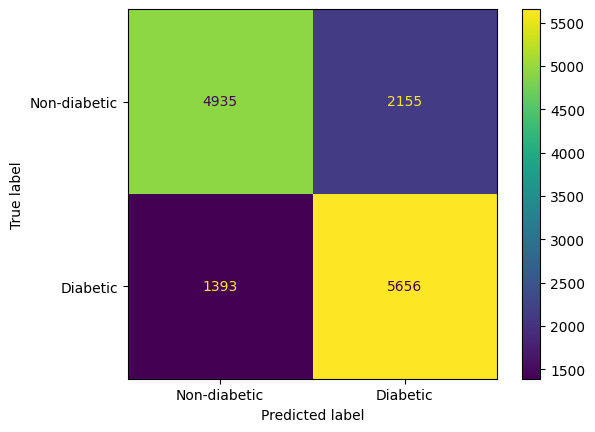

In [ ]:
# Make predictions on the test set
y_pred3 = model3.predict(X_test3)
y_pred3 = np.round(y_pred3).astype(int)  # Converting probabilities to binary class labels
# Calculate accuracy
accuracy = accuracy_score(y_test3, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Generating the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

Even if the accuracy is a bit lower, I prefer this model over the first one.
it is able to predict more cases with diabetes. Let's now try to see if we can makke any improvement of model from the second dataset. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This time in the training dataset is increased with a randomOverSampler to balance the class of Diabetes_binary and as always StandardScaler() is used to have a balacned distribution of data.

In [ ]:
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)


# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test4 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train2_resampled, y_train4 = ros.fit_resample(X_train2, y_train2)

# Check the new class distribution
print(y_train4.value_counts())

# Scaling the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train2_resampled)
X_test4 = scaler.transform(X_test2)

# Check the shapes of the datasets
print(X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape)

0.0    174595
1.0    174595
Name: Diabetes_binary, dtype: int64
(349190, 21) (349190,) (50736, 21) (50736,)


In [ ]:
#build the model
model4 = Sequential()
model4.add(Dense(64, input_shape=(X_train4.shape[1],), activation='relu'))
#model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification



# Compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 64)                1408      
                                                                 
 dense_118 (Dense)           (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7681 (30.00 KB)
Trainable params: 7681 (30.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model with Early Stopping
train4 = model4.fit(X_train4, y_train4, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model4.evaluate(X_test4, y_test4)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
2183/2183 [==============================] - 8s 4ms/step - loss: 0.4814 - accuracy: 0.7597 - val_loss: 0.6532 - val_accuracy: 0.6726
Epoch 2/100
2183/2183 [==============================] - 11s 5ms/step - loss: 0.4807 - accuracy: 0.7602 - val_loss: 0.6491 - val_accuracy: 0.6483
Epoch 3/100
2183/2183 [==============================] - 6s 3ms/step - loss: 0.4802 - accuracy: 0.7605 - val_loss: 0.6361 - val_accuracy: 0.6693
Epoch 4/100
2183/2183 [==============================] - 6s 3ms/step - loss: 0.4796 - accuracy: 0.7608 - val_loss: 0.6287 - val_accuracy: 0.6964
Epoch 5/100
2183/2183 [==============================] - 5s 2ms/step - loss: 0.4786 - accuracy: 0.7616 - val_loss: 0.6646 - val_accuracy: 0.6688
Epoch 6/100
2183/2183 [==============================] - 7s 3ms/step - loss: 0.4780 - accuracy: 0.7617 - val_loss: 0.6626 - val_accuracy: 0.6410
Epoch 7/100
2183/2183 [==============================] - 7s 3ms/step - loss: 0.4779 - accuracy: 0.7619 - val_loss: 0.6583 - val_a

1586/1586 [==============================] - 3s 2ms/step
Accuracy: 0.79


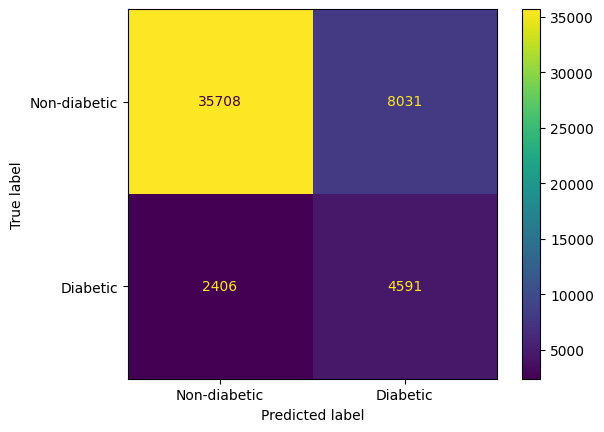

In [ ]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test4)
y_pred4 = np.round(y_pred4).astype(int)  # Converting probabilities to binary class labels
# Calculate accuracy
accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy: {accuracy:.2f}')

# Generating the confusion matrix
cm = confusion_matrix(y_test4, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

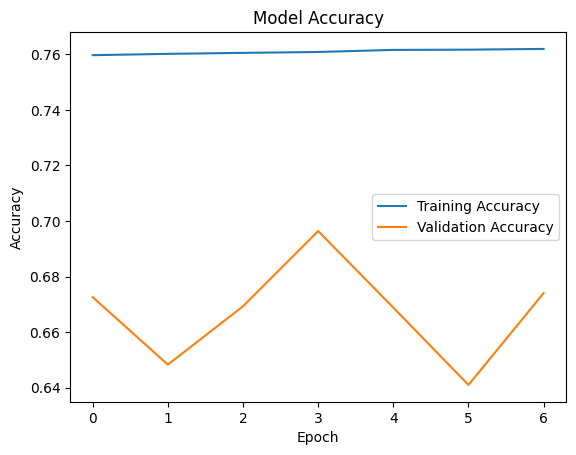

In [ ]:
#training_accuracy2 = train4.history['accuracy']
#validation_accuracy2 = train4.history['val_accuracy']
plt.plot(train4.history['accuracy'], label='Training Accuracy')
plt.plot(train4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

This is the best model so far. I will call this model X. Let's see if we can make it better, trying to increse number of epoches, new layers, removing some features of the dataset that seem to be irrelevant. Here below, I have incresed the number of neurons of the first layer to 128 and aslo put a larger patience to make the model complete the 100 ephoches and not to stop training early as before.

In [ ]:
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)


# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test4 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train2_resampled, y_train4 = ros.fit_resample(X_train2, y_train2)

# Check the new class distribution
print(y_train4.value_counts())

# Scaling the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train2_resampled)
X_test4 = scaler.transform(X_test2)

# Check the shapes of the datasets
print(X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape)
#build the model
model4 = Sequential()
model4.add(Dense(128, input_shape=(X_train4.shape[1],), activation='relu'))
#model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
#model4.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification



# Compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

0.0    174595
1.0    174595
Name: Diabetes_binary, dtype: int64
(349190, 21) (349190,) (50736, 21) (50736,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               2816      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#In this particular attempt we tries to increse the nuumber of ephoches
# Training the model with Early Stopping
train4 = model4.fit(X_train4, y_train4, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model4.evaluate(X_test4, y_test4)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
2183/2183 [==============================] - 4s 2ms/step - loss: 0.4905 - accuracy: 0.7522 - val_loss: 0.6976 - val_accuracy: 0.6395
Epoch 2/100
2183/2183 [==============================] - 3s 2ms/step - loss: 0.4839 - accuracy: 0.7564 - val_loss: 0.6427 - val_accuracy: 0.6814
Epoch 3/100
2183/2183 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.7592 - val_loss: 0.6328 - val_accuracy: 0.6896
Epoch 4/100
2183/2183 [==============================] - 3s 2ms/step - loss: 0.4772 - accuracy: 0.7615 - val_loss: 0.6659 - val_accuracy: 0.6556
Epoch 5/100
2183/2183 [==============================] - 3s 2ms/step - loss: 0.4734 - accuracy: 0.7636 - val_loss: 0.6494 - val_accuracy: 0.6843
Epoch 6/100
2183/2183 [==============================] - 4s 2ms/step - loss: 0.4693 - accuracy: 0.7664 - val_loss: 0.6502 - val_accuracy: 0.6838
Epoch 7/100
2183/2183 [==============================] - 3s 2ms/step - loss: 0.4648 - accuracy: 0.7686 - val_loss: 0.6229 - val_ac

1586/1586 [==============================] - 1s 852us/step
Accuracy: 0.78


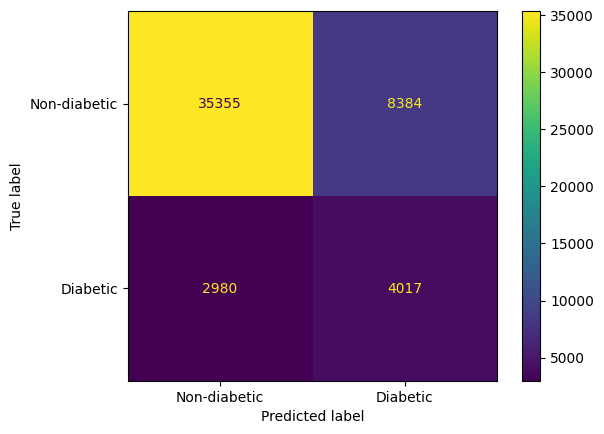

In [ ]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test4)
y_pred4 = np.round(y_pred4).astype(int)  # Converting probabilities to binary class labels
# Calculate accuracy
accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy: {accuracy:.2f}')

# Generating the confusion matrix
cm = confusion_matrix(y_test4, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

After trying to increse the number of the epoches and add more neurons we notice that the accuray of the testing has decresed slightly. So the previous model performed better with fewer ephoches and fewer neurons.

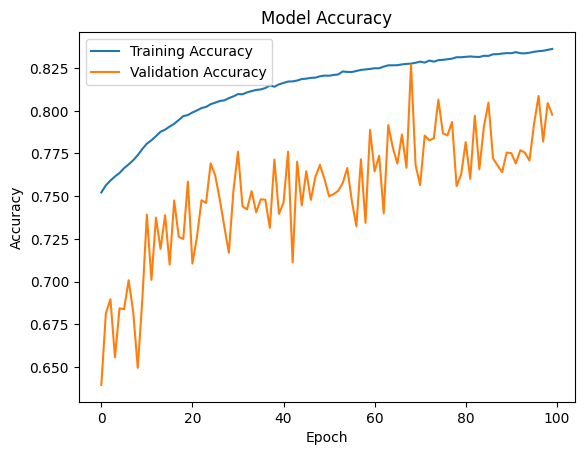

In [ ]:
#training_accuracy2 = train4.history['accuracy']
#validation_accuracy2 = train4.history['val_accuracy']
plt.plot(train4.history['accuracy'], label='Training Accuracy')
plt.plot(train4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

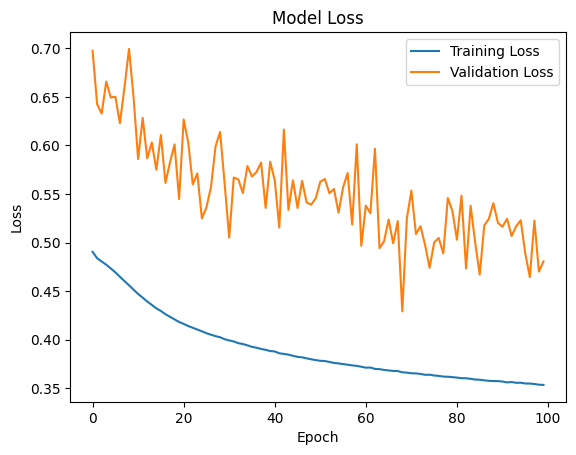

In [ ]:
# 1. Loss Plot
plt.figure()
plt.plot(train4.history['loss'], label='Training Loss')
plt.plot(train4.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

I want to see if dropping some columns from my input data can make the NN model any better. To decide which columns to drop, I created a simple RandomForest model in another notebook and I plotted a grapgh to see the feature importance in the Random Forest. These are the features that are the least relevant: 'HeartDiseaseorAttack', 'NoDocbcCost', 'HvyAlcoholConsump', 'Stroke', 'AnyHealthcare', 'CholCheck'.


In [ ]:

columns_to_drop = ['HeartDiseaseorAttack', 'NoDocbcCost', 'HvyAlcoholConsump', 'Stroke', 'AnyHealthcare', 'CholCheck']
X2_modified = df2.drop(columns_to_drop + ['Diabetes_binary'], axis=1)
y2 = df2['Diabetes_binary']

# Split the dataset into training and testing sets
X_train2_modified, X_test2_modified, y_train2, y_test4 = train_test_split(X2_modified, y2, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train2_resampled_modified, y_train4 = ros.fit_resample(X_train2_modified, y_train2)

# Scaling the features
scaler = StandardScaler()
X_train4_modified = scaler.fit_transform(X_train2_resampled_modified)
X_test4_modified = scaler.transform(X_test2_modified)

# Build the modified model
model4_modified = Sequential()
model4_modified.add(Dense(64, input_shape=(X_train4_modified.shape[1],), activation='relu'))
model4_modified.add(Dense(64, activation='relu'))
model4_modified.add(Dense(32, activation='relu'))
model4_modified.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model4_modified.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement Early Stopping
early_stopping_modified = EarlyStopping(monitor='loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

# Printing the summary of the modified model
model4_modified.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1024      
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 7297 (28.50 KB)
Trainable params: 7297 (28.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the modified model
history = model4_modified.fit(X_train4_modified, y_train4,
                              epochs=10,
                              batch_size=64,
                              validation_split=0.2,
                              callbacks=[early_stopping_modified])

# Evaluating the modified model
loss, accuracy = model4_modified.evaluate(X_test4_modified, y_test4)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
4365/4365 [==============================] - 7s 2ms/step - loss: 0.4296 - accuracy: 0.7915 - val_loss: 0.5590 - val_accuracy: 0.7514
Epoch 2/10
4365/4365 [==============================] - 7s 2ms/step - loss: 0.4277 - accuracy: 0.7928 - val_loss: 0.5596 - val_accuracy: 0.7410
Epoch 3/10
4365/4365 [==============================] - 6s 1ms/step - loss: 0.4276 - accuracy: 0.7927 - val_loss: 0.6459 - val_accuracy: 0.6995
Epoch 4/10
4365/4365 [==============================] - 7s 2ms/step - loss: 0.4273 - accuracy: 0.7929 - val_loss: 0.6048 - val_accuracy: 0.7183
Epoch 5/10
4365/4365 [==============================] - 7s 2ms/step - loss: 0.4271 - accuracy: 0.7933 - val_loss: 0.5978 - val_accuracy: 0.7247
Epoch 6/10
4365/4365 [==============================] - 6s 1ms/step - loss: 0.4266 - accuracy: 0.7936 - val_loss: 0.5755 - val_accuracy: 0.7465
Epoch 7/10
4365/4365 [==============================] - 7s 1ms/step - loss: 0.4266 - accuracy: 0.7936 - val_loss: 0.6140 - val_accuracy:

1586/1586 [==============================] - 1s 834us/step


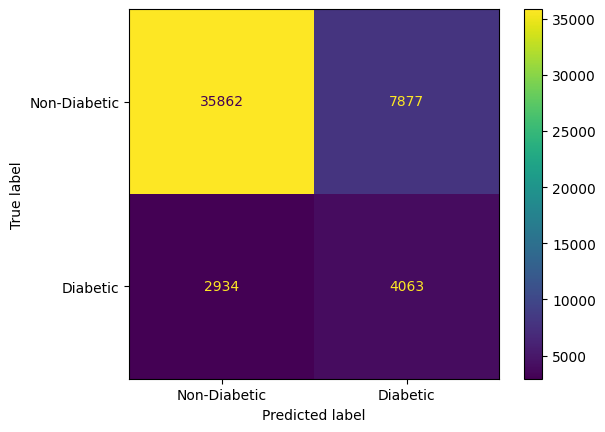

Accuracy: 0.79


In [ ]:
# Make predictions on the test set
y_pred_modified = model4_modified.predict(X_test4_modified)

# Convert predictions to binary labels (assuming your model outputs probabilities)
y_pred_binary = np.round(y_pred_modified).astype(int)

# Generating the confusion matrix
cm = confusion_matrix(y_test4, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot()
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_test4, y_pred_binary)
print(f'Accuracy: {accuracy:.2f}')

This model has a similar accuracy to model X, however it makes more mistakes predicting the diabetec label. So, overall, my model X was performing better and I will go with that one.